## Credit Card Fraud

Data Has been sourced from Kaggle

Get the real data from : https://drive.google.com/file/d/1r1TU_hPn_SQwhElDE47ObdPAkDTOMkFO/view?usp=sharing


The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Our task is to make a simple DL classifer to correctly classify frauds.

In [1]:
# Starting with useful imports
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
%ls

MyDrive/


In [4]:
fname = 'My Drive/Data/creditcard.csv'
all_features = []
all_targets = []
with open(fname) as f:
  for i, line in enumerate(f):
    if i == 0:
      print('HEADER:', line.strip())
      continue  # Skip header
    fields = line.strip().split(',')
    all_features.append([float(v.replace('"', '')) for v in fields[:-1]])
    all_targets.append([int(fields[-1].replace('"', ''))])
    if i == 1:
      print('EXAMPLE FEATURES:', all_features[-1])
    
features = np.array(all_features, dtype='float32')
targets = np.array(all_targets, dtype='uint8')
print('features.shape:', features.shape)
print('targets.shape:', targets.shape)

HEADER: "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
EXAMPLE FEATURES: [0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]
features.shape: (284807, 30)
targets.shape: (284807, 1)


In [5]:
print(len(features[:,0]))
print(len(targets))

284807
284807


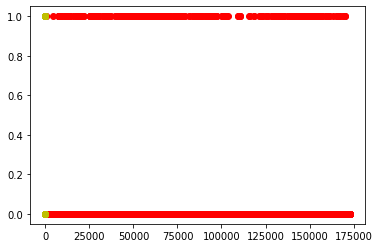

In [6]:
plt.scatter(features[:,0],targets,color='r')
plt.scatter(features[:,1],targets,color='g')
plt.scatter(features[:,2],targets,color='b')
plt.scatter(features[:,3],targets,color='y')
plt.show()

In [7]:
counts=np.bincount(targets[:,0])
print('Number of Negative samples in training data: {} ({:.2f}% of total)'.format(counts[0], 100 * float(counts[0]) / len(targets)))
print('Number of positive samples in training data: {} ({:.2f}% of total)'.format(counts[1], 100 * float(counts[1]) / len(targets)))

Number of Negative samples in training data: 284315 (99.83% of total)
Number of positive samples in training data: 492 (0.17% of total)


As in the target data, Positive class is 0.17% (492 samples) while Negative class is 99.83% (284315 samples) so clearly we can see there is data impbalance issue. Negative classes are compartively too high than Positive classes.

To handle the data imbalance issue we need to do SMOTE analysis. SMOTE is used for over-sampling.

In [8]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
features_resampled, targets_resampled = SMOTE().fit_sample(features,targets)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
np.bincount(targets_resampled)

array([284315, 284315])

In [29]:
np.bincount(targets_resampled[targets_resampled==2])

array([], dtype=int64)

Now we have equal number of class 1 and class 0.

Train test split manual with out shuffling

In [11]:
num_test_samples = int(len(features_resampled) * 0.2)
train_features = features_resampled[:-num_test_samples]
train_targets = targets_resampled[:-num_test_samples]
test_features = features_resampled[-num_test_samples:]
test_targets = targets_resampled[-num_test_samples:]
print('Number of training samples:', len(train_features))
print('Number of test samples:', len(test_features))

Number of training samples: 454904
Number of test samples: 113726


In [12]:
counts = np.bincount(train_targets)
print(counts)
print('Number of positive samples in training data: {} ({:.2f}% of total)'.format(counts[1], 100 * float(counts[1]) / len(train_targets)))

[284315 170589]
Number of positive samples in training data: 170589 (37.50% of total)


In [35]:
counts = np.bincount(test_targets)
print(counts)
print('Number of positive samples in testing data: {} ({:.2f}% of total)'.format(counts[1], 100 * float(counts[1]) / len(test_targets)))

[     0 113726]
Number of positive samples in testing data: 113726 (100.00% of total)


Train Test Split using SKLearn library by shuffling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test=train_test_split(features_resampled,targets_resampled,test_size=0.2,random_state=1,shuffle=True)

In [36]:
counts = np.bincount(y_train)
print(counts)
print('Number of positive samples in training data: {} ({:.2f}% of total)'.format(counts[1], 100 * float(counts[1]) / len(train_targets)))

[227389 227515]
Number of positive samples in training data: 227515 (50.01% of total)


In [37]:
counts = np.bincount(y_test)
print(counts)
print('Number of positive samples in testing data: {} ({:.2f}% of total)'.format(counts[1], 100 * float(counts[1]) / len(test_targets)))

[56926 56800]
Number of positive samples in testing data: 56800 (49.94% of total)


In [38]:
train_features=x_train
test_features=x_test

train_targets=y_train
test_targets=y_test

Standardization

In [39]:
mean = np.mean(train_features, axis=0)
train_features -= mean
test_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
test_features /= std

In [43]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [95]:
# Create a `Sequential` model and add a Dense layer as the first layer.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(30,)))
model.add(tf.keras.layers.Dense(28,activation='relu')) #1st layer
model.add(tf.keras.layers.Dense(14,activation='tanh')) #2nd layer
model.add(tf.keras.layers.Dense(7,activation='relu')) #3rd layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Output layer
#model.output_shape

In [96]:
optimizer=tf.keras.optimizers.Adam(1e-3)
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [97]:
metrics = [keras.metrics.FalseNegatives(name='fn'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.TruePositives(name='tp'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.Accuracy(name='accuracy')]

In [64]:
accuracy=tf.keras.metrics.BinaryAccuracy()

In [98]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [99]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 28)                868       
_________________________________________________________________
dense_15 (Dense)             (None, 14)                406       
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 8         
Total params: 1,387
Trainable params: 1,387
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
model.fit(x=train_features, y=train_targets, batch_size=228, epochs=60, verbose=1)

Epoch 1/60
1996/1996 [==============================] - 4s 2ms/step - loss: 7.5277e-04 - fn: 11.0000 - fp: 71.0000 - tn: 227318.0000 - tp: 227504.0000 - precision: 0.9997 - recall: 1.0000 - accuracy: 0.1960
Epoch 2/60
1996/1996 [==============================] - 4s 2ms/step - loss: 9.5935e-04 - fn: 30.0000 - fp: 81.0000 - tn: 227308.0000 - tp: 227485.0000 - precision: 0.9996 - recall: 0.9999 - accuracy: 0.2232
Epoch 3/60
1996/1996 [==============================] - 4s 2ms/step - loss: 8.2525e-04 - fn: 20.0000 - fp: 77.0000 - tn: 227312.0000 - tp: 227495.0000 - precision: 0.9997 - recall: 0.9999 - accuracy: 0.2284
Epoch 4/60
1996/1996 [==============================] - 4s 2ms/step - loss: 8.3949e-04 - fn: 28.0000 - fp: 70.0000 - tn: 227319.0000 - tp: 227487.0000 - precision: 0.9997 - recall: 0.9999 - accuracy: 0.2377
Epoch 5/60
1996/1996 [==============================] - 4s 2ms/step - loss: 8.9480e-04 - fn: 30.0000 - fp: 75.0000 - tn: 227314.0000 - tp: 227485.0000 - precision: 0.9997 -

In [108]:
training_score = model.evaluate(train_features, train_targets, verbose=1)
print(training_score)

14216/14216 [==============================] - 19s 1ms/step - loss: 1.5279e-04 - fn: 0.0000e+00 - fp: 13.0000 - tn: 227376.0000 - tp: 227515.0000 - precision: 0.9999 - recall: 1.0000 - accuracy: 0.3920
[0.00015279435319826007, 0.0, 13.0, 227376.0, 227515.0, 0.9999428391456604, 1.0, 0.3920057713985443]


In [109]:
testing_score = model.evaluate(test_features, test_targets, verbose=1)
print(testing_score)

3554/3554 [==============================] - 5s 1ms/step - loss: 0.0014 - fn: 0.0000e+00 - fp: 21.0000 - tn: 56905.0000 - tp: 56800.0000 - precision: 0.9996 - recall: 1.0000 - accuracy: 0.3915
[0.0013998799258843064, 0.0, 21.0, 56905.0, 56800.0, 0.9996303915977478, 1.0, 0.391484797000885]


In [110]:
F1=(0.9996303915977478*1)/(0.9996303915977478+1)
print(F1)

0.4999075808199842


In [111]:
classes = model.predict(x=test_features, batch_size=128)

In [116]:
print(classes)

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 

The output of a neural network will never, by default, be binary - i.e. zeros or ones. The network works with continuous values (not discrete) in order to optimise the loss more freely in the framework of gradient descent.Need to write a function that turns your values above into 0 or 1, based on some threshold.

In [115]:
classes=list(map((lambda x:0 if x<0.5 else 1),classes))

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, roc_auc_score,roc_curve,auc

In [117]:
confusion_matrix(y_true=test_targets,y_pred=classes)

array([[56905,    21],
       [    0, 56800]])

In [131]:
fpr,tpr,threshold=roc_curve(test_targets,classes,pos_label=1)

In [132]:
roc_auc=auc(fpr,tpr)

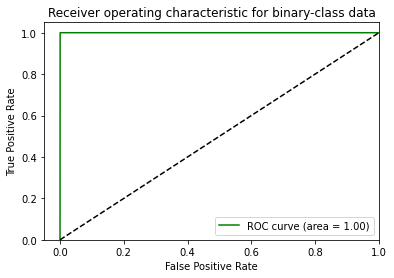

In [134]:
plt.plot(fpr, tpr, color='g',label='ROC curve (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for binary-class data')
plt.legend(loc="lower right")
plt.show()